In [4]:
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd 


In [7]:
f = "ml2023_projectmbf-main/data_labeled_fixed.csv"

In [5]:
f = "../../ml2023/data_labeled.csv"

In [8]:
df = pd.read_csv(f, header=0)

In [9]:

df.head()


,Acin1,Actb,Agap1,Ahi1,Akap11,Akap9,Aldoa,Aldoc,Ankrd12,Anp32a,...,mt-Co1,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd4,mt-Nd5,mt-Rnr1,mt-Rnr2,CELLTYPE,CLASS
0,3,0,0,1,2,0,1,0,3,2,...,0,12,3,5,5,4,2,25,BC6,Cone Bipolar ON
1,0,1,0,0,0,0,3,0,0,4,...,1,5,1,0,2,1,0,16,BC3B,Cone Bipolar OFF
2,0,0,0,0,0,0,2,1,0,0,...,0,12,5,3,10,4,1,14,BC6,Cone Bipolar ON
3,0,1,0,4,0,0,1,0,0,1,...,0,8,1,3,3,1,0,7,BC3A,Cone Bipolar OFF
4,0,1,0,1,0,0,7,1,2,4,...,0,17,7,3,0,4,0,3,BC7,Cone Bipolar ON


In [10]:
df.shape

(3724, 454)

In [23]:
exp = df.drop(["CLASS", "CELLTYPE"], axis = 1)
genes = exp.columns

In [24]:
scaler = StandardScaler().fit(exp)
exp = scaler.transform(exp)

In [25]:
pca = PCA(n_components=2)

In [26]:
comp = pca.fit_transform(exp)
score = pd.DataFrame(comp, columns=["PC1", "PC2"])
score = pd.concat([score, df["CLASS"]], axis = 1)

In [27]:
loadings = pd.DataFrame(np.transpose(pca.components_), columns = ["PC1","PC2"])
labels = pd.DataFrame(genes, columns=["gene"])
loadings = pd.concat([loadings, labels], axis =1)

In [28]:
loadings[["PC1"]].idxmax()

PC1    138
dtype: int64

In [29]:
loadings.PC2.idxmax()

146

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as Colors

In [74]:
def biplot(score, loadings, sf = 0.5):
    xs = score.iloc[:,0]
    ys = score.iloc[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig, axes = plt.subplots(figsize = (7, 7))
    sns.scatterplot(ax=axes, x= score.PC1 * scalex, y=score.PC2*scaley, hue = df["CLASS"], alpha =0.6)
    #sns.scatterplot(ax=axes, x= score.PC1 , y=score.PC2, hue = df["CLASS"],size=1)
    pc1min, pc1max = loadings.PC1.idxmin(), loadings.PC1.idxmax()
    pc2min, pc2max = loadings.PC2.idxmin(), loadings.PC2.idxmax()

    arrows = [pc1min, pc1max, pc2min, pc2max]
    
    for arrow in arrows:
        x, y, label = loadings.iloc[arrow, :]
        if x**2 > 0.1 or y**2 > 0.001:
            x, y = x * sf, y * sf
            plt.arrow(0, 0,  x, y, color = 'r',alpha = 0.5)
            plt.text(x * 1.15, y * 1.15, label, va = "center", ha = "center", size = 14)

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

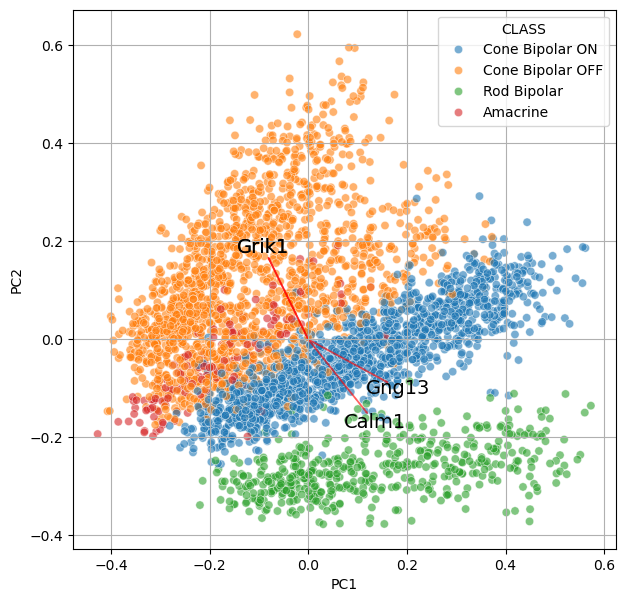

In [75]:
biplot(score, loadings, 1)

In [73]:
loadings

,PC1,PC2,gene
0,0.022556,0.046568,Acin1
1,0.050085,0.034061,Actb
2,0.033387,0.025599,Agap1
3,0.024855,0.027838,Ahi1
4,0.029744,0.021328,Akap11
...,...,...,...
447,0.065772,-0.003910,mt-Nd2
448,0.073843,0.006605,mt-Nd4
449,0.053163,0.019009,mt-Nd5
450,0.005118,0.018236,mt-Rnr1


# k-means 

In [76]:
from sklearn.cluster import KMeans

In [179]:
def km_cluster(data, nk = range(1, 3)):

    res = []
    for k in nk:
        km = KMeans(n_clusters=k)
        fitted = km.fit(data)
        res.append(fitted.inertia_)
    
    res = np.array(res)
    X = x = np.arange(1,len(nk)+1, step = 1)
    
    fig, axes = plt.subplots(1,1, figsize = (5,5))
    sns.lineplot(x = X, y = res, ax=axes, color = "black")
    sns.scatterplot(x = X, y=res, ax=axes, color = "r")
    plt.xlabel("k")
    plt.ylabel("Inertia")
    plt.xticks(X)
    plt.grid()


In [180]:
np.arange(1, 20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

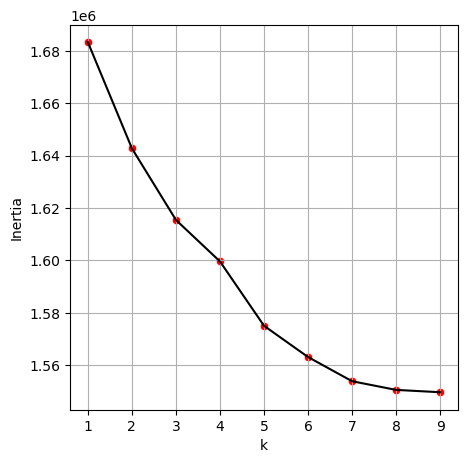

In [184]:
km_cluster(exp, nk = range(1, 10))

In [185]:
k = 7
km = KMeans(n_clusters=6)

fitted = km.fit(exp)

In [186]:
fitted.labels_

array([1, 0, 1, ..., 2, 2, 2], dtype=int32)

In [192]:
cl_score = pd.concat([score, pd.Series(fitted.labels_, name = "Cluster")], axis = 1)

In [206]:
cl_score

,PC1,PC2,CLASS,Cluster
0,1.809979,-1.176693,Cone Bipolar ON,1
1,-0.456682,8.354358,Cone Bipolar OFF,0
2,8.067992,2.022648,Cone Bipolar ON,1
3,1.498081,4.814251,Cone Bipolar OFF,0
4,7.122736,2.570319,Cone Bipolar ON,4
...,...,...,...,...
3719,-3.790940,-3.905101,Cone Bipolar ON,2
3720,-4.214774,-3.078012,Cone Bipolar ON,2
3721,-3.638886,-3.846500,Cone Bipolar ON,2
3722,-3.992286,-1.789472,Cone Bipolar OFF,2


In [258]:
dd.iloc[1, :]

0    0
1    1
Name: 1, dtype: int64

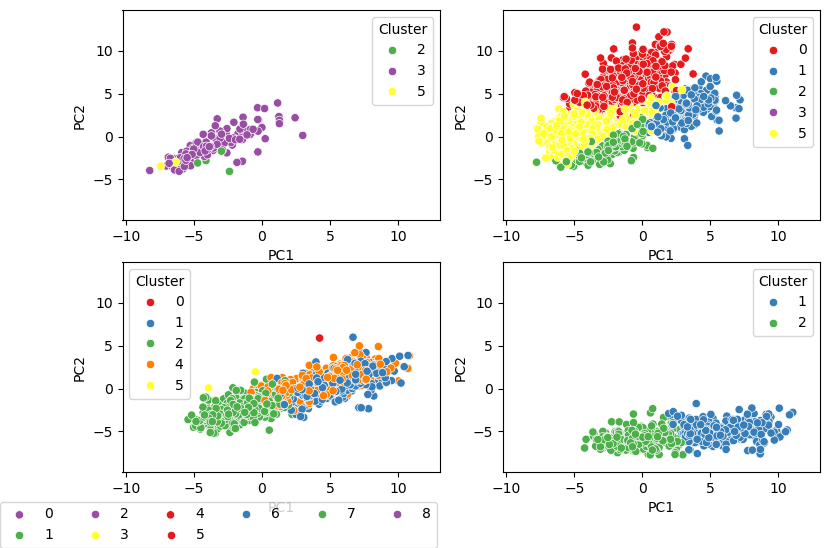

In [360]:
fig, axes = plt.subplots(2, 2, figsize=(9,6))
markers = ["x", "+", "D", "*", ".", "^", "s"]
place = pd.DataFrame(np.matrix("0 0; 0 1;1 0; 1 1; 1 2"))
colormap = dict(zip( range(0,9), sns.color_palette("Set1")))

for i, (k, sub) in enumerate(cl_score.groupby("CLASS")):
    cl = sub.Cluster.unique()
    mask = [is_in(x, cl) for x in range(len(cl))]
    ii, j = place.iloc[i,:]

    sns.scatterplot(data=sub, x="PC1", y="PC2", hue="Cluster", palette=colormap, ax=axes[ii, j], )
    #axes[ii,j].scatter(x=sub.PC1, y=sub.PC2, hue = )
    axes[ii,j].set_xlim(cl_score.PC1.min() - 2 , cl_score.PC1.max() + 2)
    axes[ii,j].set_ylim(cl_score.PC2.min() - 2, cl_score.PC2.max() + 2)

#handles, labels = fig.gca().get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
fig.legend(colormap, loc = (0, 0), ncol=6)

In [343]:
np.array(sns.color_palette("Set1"))[mask]

array([[0.30196078, 0.68627451, 0.29019608],
       [0.59607843, 0.30588235, 0.63921569],
       [1.        , 1.        , 0.2       ]])

In [329]:
c = [3, 5, 2]

In [334]:
mask = [is_in(x, c) for x in range(9)]

In [340]:
unlist

[False, False, True, True, False, True, False, False, False]

In [332]:
def is_in(x, l):
    if x in l:
        x = True
    else: 
        x = False
    return x

In [298]:
Color.cmap

NameError: name 'Color' is not defined

In [ ]:
for k, x in score.groupby("CLASS"):
    print(x.shape)